# **PROJECT OBJECTIVE**: Face detection from training images.

In [1]:
%matplotlib inline 
import numpy as np   
import pandas as pd
import numpy.ma as ma
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches

import os
import cv2
import warnings
import cv2 as cv
#from glob import glob
from termcolor import colored
warnings.filterwarnings('ignore')

import random
import skimage
from PIL import Image as im
from skimage.io import imread
from skimage.transform import resize
from skimage.measure import regionprops

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau,EarlyStopping
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.layers import Concatenate, Conv2D, Reshape, UpSampling2D

from sklearn.model_selection import train_test_split

print(tf.__version__)

2.4.1


In [2]:
print(colored('\x1B[1mMounting drive on colab.....','blue'))
from google.colab import drive
drive.mount('/content/drive')

Mounting drive on colab.....
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
print(colored('\x1B[1mImoprting dataset from drive.....','blue'))
data_path = '/content/drive/MyDrive/Files/Part 1- Train data - images.npy'

Imoprting dataset from drive.....


In [4]:
print(colored('\x1B[1mLoading data.....','blue'))
data = np.load(data_path, allow_pickle=True)

Loading data.....


In [5]:
print(colored('\x1B[1mData shape : '+str(data.shape),'blue'))

Data shape : (409, 2)


In [6]:
print(colored('\x1B[1mSeperating RBG Images from data','blue'))
n_data = []
for x in range(0,data.shape[0]):
  if len(data[x][0].shape)==3:
    if data[x][0].shape[2]==3:
      n_data.append(data[x])
n_data = np.array(n_data)

Seperating RBG Images from data


In [7]:
print(colored('\x1B[1mTotal RGB images : '+str(n_data.shape[0])+'','blue'))

Total RGB images : 397


In [8]:
print(colored('\x1B[1mMaking list of images for maskng from data','blue'))
#images1=[]
#for x in range(0,len(n_data)):
#  images1.append(n_data[x][0])
print(colored('\x1B[1mSince the mask is created so not re-running again','green'))

Making list of images for maskng from data
Since the mask is created so not re-running again


In [9]:
print(colored('\x1B[1mGenerating RGB masks from images','blue'))
#for j in range(len(images1)):
#  image = images1[j]
#  mask = np.ones(shape=image.shape[0:2], dtype="bool")
#  for i in range(len(n_data[j][1])):
#   iw,ih=images1[j].shape[1],images1[j].shape[0]
#    x = int(n_data[j][1][i]['points'][0]['x']*iw-.1)
#    y = int(n_data[j][1][i]['points'][0]['y']*ih-.1)
#    w = int(n_data[j][1][i]['points'][1]['x']*iw-.1)
#    h = int(n_data[j][1][i]['points'][1]['y']*ih-.1)
#    rr, cc = skimage.draw.rectangle(start=(y,x), end=(h,w))
#    mask[rr,cc] = False
#  image[mask] = 0
print(colored('\x1B[1mSince the mask is created so not re-running again','green'))

Generating RGB masks from images
Since the mask is created so not re-running again


In [10]:
print(colored('\x1B[1mConverting mask list to array','blue'))
#mask_1 = np.array(images1)
print(colored('\x1B[1mSince the conversion is done, so not re-running again','green'))

Converting mask list to array
Since the conversion is done, so not re-running again


In [11]:
print(colored('\x1B[1mSaving generated Mask to drive in .npy format','blue'))
print(colored('\x1B[1mSaves time of running repeatedly','blue'))
#np.save('/content/drive/MyDrive/Files/mask_1.npy',mask_1)
print(colored('\x1B[1mSince the saving is done, so not re-running again','green'))

Saving generated Mask to drive in .npy format
Saves time of running repeatedly
Since the saving is done, so not re-running again


In [12]:
print(colored('\x1B[1mLoading generated Mask from drive','blue'))
maski = np.load("/content/drive/MyDrive/Files/mask_1.npy", allow_pickle=True)

Loading generated Mask from drive


In [13]:
print(colored('\x1B[1m Again loading data for taking images from it.....','blue'))
data = np.load(data_path, allow_pickle=True)

 Again loading data for taking images from it.....


In [14]:
print(colored('\x1B[1mSeperating RBG Images from data','blue'))
n_data = []
for x in range(0,data.shape[0]):
  if len(data[x][0].shape)==3:
    if data[x][0].shape[2]==3:
      n_data.append(data[x])
n_data = np.array(n_data)

Seperating RBG Images from data


In [15]:
print(colored('\x1B[1mMaking list of images from data','blue'))
images2=[]
for x in range(0,len(n_data)):
  images2.append(n_data[x][0])

Making list of images from data


In [16]:
print(colored('\x1B[1mGenerating bitwise masks from RGB masks','blue'))
masks=[]
for i in range(0,len(n_data)):
  im_color = maski[i]
  im_gray = cv.cvtColor(im_color, cv.COLOR_BGR2GRAY)
  (thresh, im_bw) = cv2.threshold(im_gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
  masks.append(im_bw)

Generating bitwise masks from RGB masks


In [17]:
print(colored('\x1B[1mReshaping all images in format of unet model','blue'))
images_f=[]
mask_f=[]
for i in range(0,len(n_data)):
  images2[i] = np.array(images2[i])
  images_f.append(resize(images2[i],(224,224)))

  masks[i] = np.array(masks[i])
  mask_f.append(resize(masks[i],(28,28)))

mask_f = np.array(mask_f)
images_f = np.array(images_f)

Reshaping all images in format of unet model


Ploting some normal images and mask images
				Image No:  101
	 RBGImage		     RGBMask			Mask


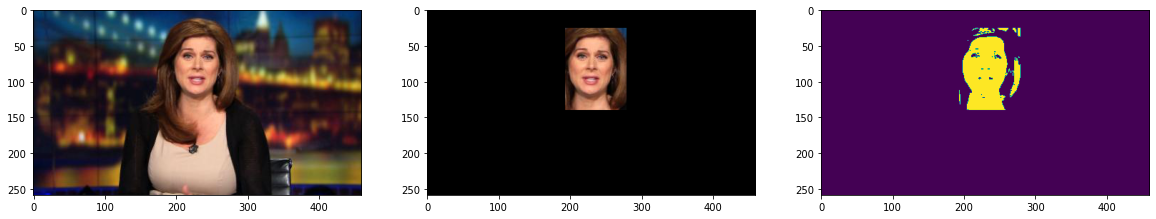

				Image No:  217
	 RBGImage		     RGBMask			Mask


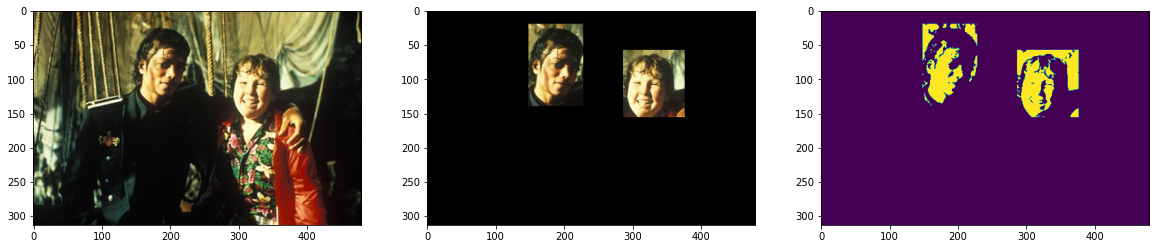

				Image No:  261
	 RBGImage		     RGBMask			Mask


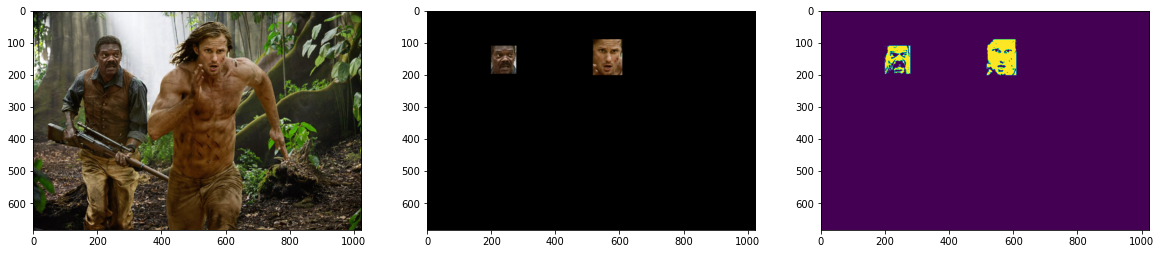

				Image No:  19
	 RBGImage		     RGBMask			Mask


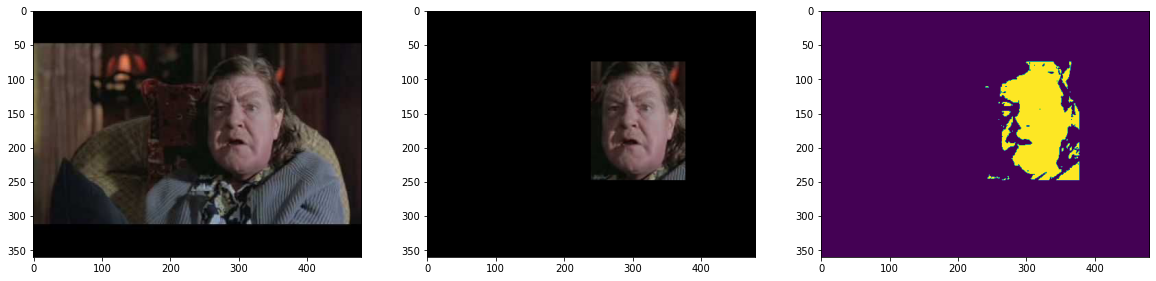

				Image No:  12
	 RBGImage		     RGBMask			Mask


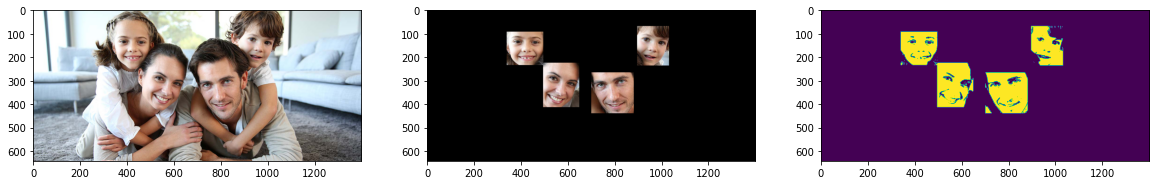

In [18]:
print(colored('\x1B[1mPloting some normal images and mask images','blue'))
for y in range(0,5):
  plt.figure(figsize=(20,20))
  x=random.choice(range(len(images2)))
  print('\t\t\t\tImage No: ',x+1)
  print('\t RBGImage\t\t     RGBMask\t\t\tMask')
  plt.subplot(1, 3, 1)
  plt.imshow(images2[x])
  plt.subplot(1, 3, 2)
  plt.imshow(maski[x])
  plt.subplot(1, 3, 3)
  plt.imshow(masks[x])
  plt.show()

In [19]:
print(colored('\x1B[1mSplting data into train, validation and test set','blue'))
X_train, X_test, y_train, y_test = train_test_split(images_f, mask_f , test_size=0.20, random_state=0)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test , test_size=0.20, random_state=0)

Splting data into train, validation and test set


In [20]:
print(colored('\x1B[1mDefining model','blue'))
def create_model(trainable=True):
    model = MobileNet(input_shape=(224, 224, 3), include_top=False, alpha=1, weights="imagenet")

    for layer in model.layers:
        layer.trainable = trainable

    block1 = model.get_layer("conv_pw_5_relu").output
    block2 = model.get_layer("conv_pw_11_relu").output
    block3 = model.get_layer("conv_pw_13_relu").output

    x = Concatenate()([UpSampling2D()(block3), block2])
    x = Concatenate()([UpSampling2D()(x), block1])

    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)
    x = Reshape((28, 28))(x)

    return Model(inputs=model.input, outputs=x)

Defining model


In [21]:
print(colored('\x1B[1mDefining Dice-coefficient function','blue'))
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tf.keras.backend.epsilon())

Defining Dice-coefficient function


In [22]:
print(colored('\x1B[1mDefining loss function','blue'))
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - tf.keras.backend.log(dice_coefficient(y_true, y_pred) + tf.keras.backend.epsilon())

Defining loss function


In [23]:
print(colored('\x1B[1mCreating model','blue'))

Creating model


In [24]:
model = create_model(False)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
__________________________________________________________________________________________________
conv1_relu (ReLU)               (None, 112, 112, 32) 0           conv1_bn[0][0]                   
______________________________________________________________________________________________

In [25]:
print(colored('\x1B[1mCompiling model','blue'))
optimizer = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss=loss, optimizer=optimizer, metrics=[dice_coefficient])

Compiling model


In [26]:
print(colored('\x1B[1mSetting earlystoping','blue'))
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min', min_lr=1e-6)

Setting earlystoping


In [27]:
print(colored('\x1B[1mFitting the model','blue'))

Fitting the model


In [28]:
history =  model.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs=50, batch_size=2, verbose=1,callbacks=[earlyStopping, reduce_lr_loss])

Epoch 1/50
159/159 [==============================] - 22s 122ms/step - loss: 3.3791 - dice_coefficient: 0.1141 - val_loss: 2.3007 - val_dice_coefficient: 0.1590
Epoch 2/50
159/159 [==============================] - 18s 116ms/step - loss: 1.9381 - dice_coefficient: 0.2238 - val_loss: 1.7340 - val_dice_coefficient: 0.2562
Epoch 3/50
159/159 [==============================] - 18s 114ms/step - loss: 1.6015 - dice_coefficient: 0.2935 - val_loss: 1.4768 - val_dice_coefficient: 0.3094
Epoch 4/50
159/159 [==============================] - 19s 117ms/step - loss: 1.2646 - dice_coefficient: 0.3698 - val_loss: 1.3272 - val_dice_coefficient: 0.3496
Epoch 5/50
159/159 [==============================] - 18s 115ms/step - loss: 1.2264 - dice_coefficient: 0.3931 - val_loss: 1.2361 - val_dice_coefficient: 0.3753
Epoch 6/50
159/159 [==============================] - 20s 128ms/step - loss: 1.1502 - dice_coefficient: 0.4067 - val_loss: 1.1708 - val_dice_coefficient: 0.3977
Epoch 7/50
159/159 [==============

	      Loss analysis graph of Model



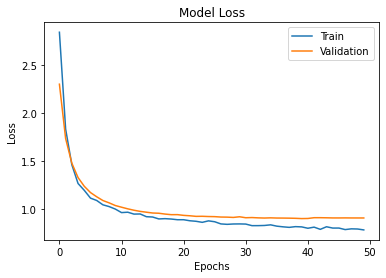

In [29]:
print(colored('\x1B[1m\t      Loss analysis graph of Model\n','green'))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

	Dice_coefficient analysis of Model



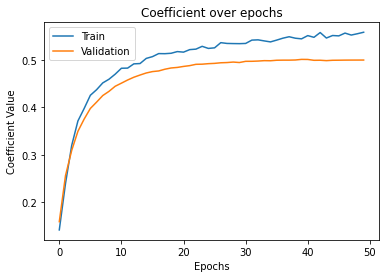

In [30]:
print(colored('\x1B[1m\tDice_coefficient analysis of Model\n','green'))
plt.plot(history.history['dice_coefficient'])
plt.plot(history.history['val_dice_coefficient'])
plt.title('Coefficient over epochs')
plt.ylabel('Coefficient Value')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

In [31]:
print(colored('\x1B[1mEvaluating Model','blue'))
model.evaluate(X_test, y_test)

Evaluating Model
2/2 [==============================] - 3s 1s/step - loss: 0.8131 - dice_coefficient: 0.5547


[0.8130640983581543, 0.5546934604644775]

In [32]:
print(colored('\x1B[1mPrediciting the test image','blue'))
print(colored('\x1B[1mImporting image from drive','blue'))

filename = '/content/drive/MyDrive/Files/Part 1Test Data - Prediction Image.jpeg'

image_u = cv2.imread(filename)
unscaled = cv2.cvtColor(image_u, cv2.COLOR_BGR2RGB)

Prediciting the test image
Importing image from drive


In [33]:
print(colored('\x1B[1mResizing image in format of unet for predicition','blue'))
image_r = cv2.resize(unscaled, (224,224))
feat_scaled = preprocess_input(np.array(image_r, dtype=np.float32))
img = image_r.copy()
img_1 = image_r.copy()

Resizing image in format of unet for predicition


In [34]:
print(colored('\x1B[1mPrediciting image from model','blue'))
pred_mask = cv2.resize(1.0*(model.predict(x=np.array([feat_scaled]))[0] > 0.5), (224,224))
image2 = image_r
image2[:,:,0] = pred_mask*image_r[:,:,0]
image2[:,:,1] = pred_mask*image_r[:,:,1]
image2[:,:,2] = pred_mask*image_r[:,:,2]
out_image = image2

Prediciting image from model


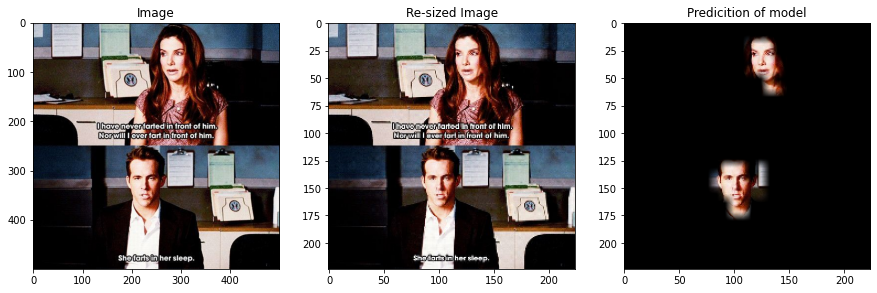

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 5))
ax1.imshow(unscaled)
ax1.set_title('Image')

ax2.imshow(img)
ax2.set_title('Re-sized Image')

ax3.imshow(out_image)
ax3.set_title('Predicition of model')
plt.show()

In [36]:
img = out_image
img_grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh_img = cv2.threshold(img_grey, 128, 255, cv2.THRESH_BINARY)

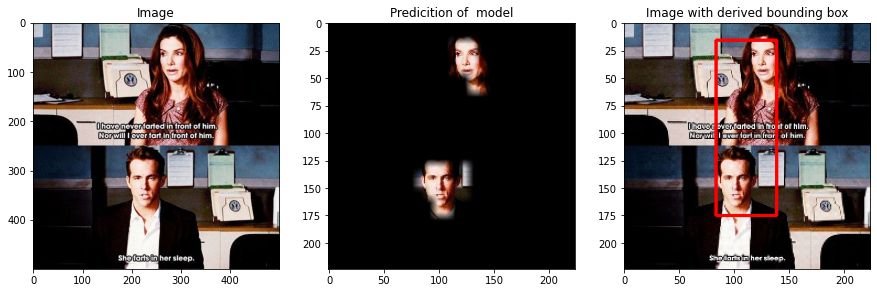

In [37]:
props = regionprops(thresh_img)
img_2 = unscaled.copy()
for prop in props:
  #if len(props) == 3:
   # break
    cv2.rectangle(img_1, (prop.bbox[1], prop.bbox[0]), (prop.bbox[3], prop.bbox[2]), (255, 0, 0), 2)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 5))

ax1.imshow(img_2)
ax1.set_title('Image')
ax2.imshow(out_image, cmap='gray')
ax2.set_title('Predicition of  model')
ax3.imshow(img_1)
ax3.set_title('Image with derived bounding box')
plt.show()